<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Capstone Project: Animal Behaviour Analyser

## Part 1: Background

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
import cv2
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import skimage as ski

import glob


### Convert Video Files into Image Files

In [ ]:
cam = cv2.VideoCapture("sitdown_01.mp4")

frameno = 0
while(True):
   ret,frame = cam.read()
   if ret:
      # if video is still left continue creating images
      name = str(frameno) + '.jpg'
      print ('new frame captured...' + name)

      cv2.imwrite(name, frame)
      frameno += 1
   else:
      break

cam.release()
cv2.destroyAllWindows()

In [ ]:
cam = cv2.VideoCapture("wagtail_01.mp4")

frameno = 0
while(True):
   ret,frame = cam.read()
   if ret:
      # if video is still left continue creating images
      name = str(frameno) + '.jpg'
      print ('new frame captured...' + name)

      cv2.imwrite(name, frame)
      frameno += 1
   else:
      break

cam.release()
cv2.destroyAllWindows()

In [ ]:
# Retrieve all converted images under the input directory

import os

for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

In [ ]:
def get_images(path):
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path,file)):
            yield file

In [ ]:
images = get_images('./data/sitdown_01')
sitdown_files = sorted([i for i in images if i.endswith('.jpg')])

print(sitdown_files)

In [ ]:
images = get_images('./data/wagtail_01')
wagtail_files = sorted([i for i in images if i.endswith('.jpg')])

print(wagtail_files)

## EDA

In [2]:
num_classes = 2

In [3]:
class_folders = ['./data/0','./data/1']

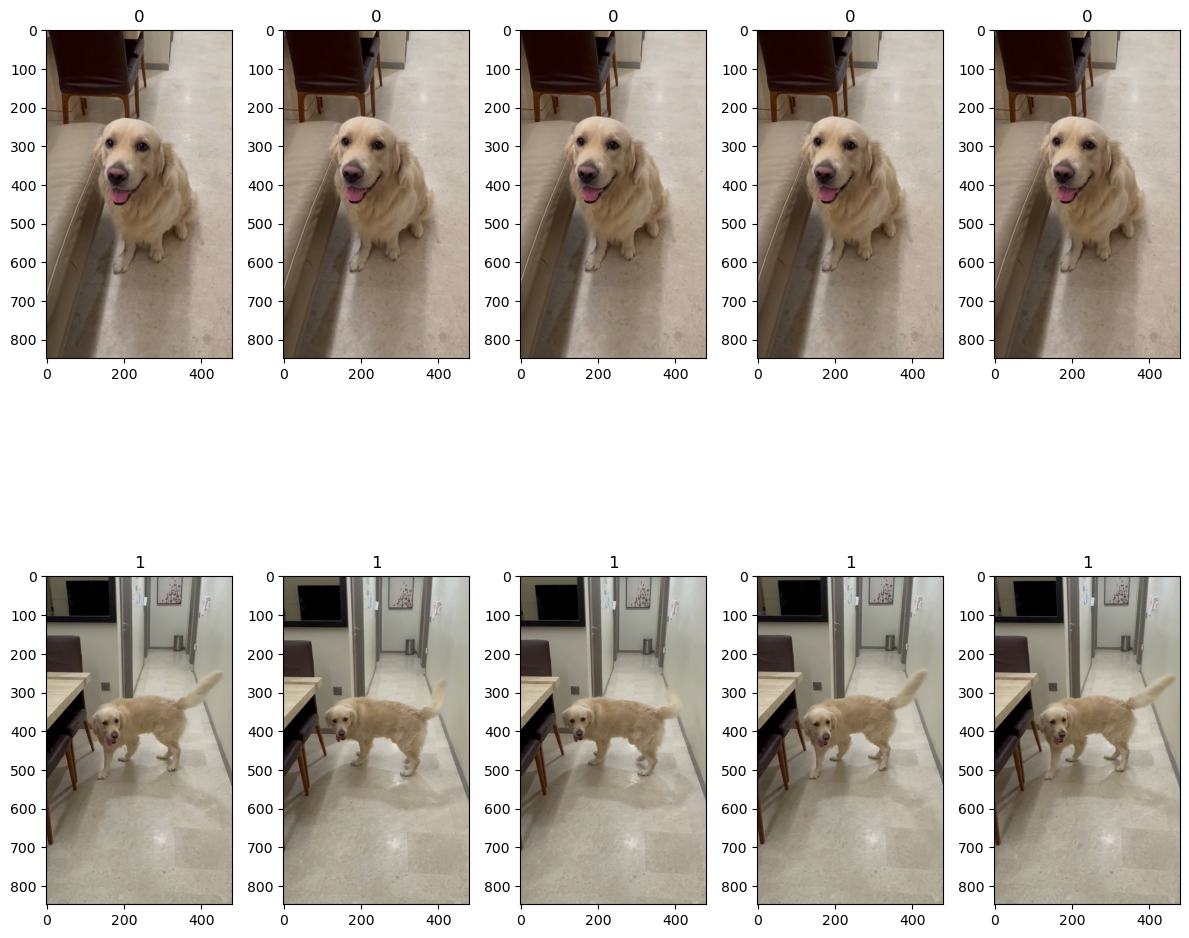

In [4]:
fig, axs = plt.subplots(nrows=2,ncols=5,figsize=(12,12))
for i, folder in enumerate(class_folders):
    for j, filename in enumerate(glob.glob(folder + '/*.jpg')[:5]):
        image = ski.io.imread(filename)
        axs[i,j].imshow(image)
        axs[i,j].set_title(filename.split('/')[-2])

plt.tight_layout()

## Modelling

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.preprocessing import image

# Class 0 - Sit Down
# Class 1 - Wag Tail

# Define the input size
input_size = (32, 32)
batch_size = 32

# Create an ImageDataGenerator for data loading and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2  # Split data into training and validation
)

train_generator = datagen.flow_from_directory(
    "data",
    target_size=input_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Use 'training' for the training set
)

validation_generator = datagen.flow_from_directory(
    "data",
    target_size=input_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Use 'validation' for the validation set
)

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_size + (3,)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model
history = cnn.fit(train_generator, epochs=20, validation_data=validation_generator)

# Evaluate the model on the training and validation sets
train_accuracy = cnn.evaluate(train_generator)[1]
test_accuracy = cnn.evaluate(validation_generator)[1]

print("Train accuracy:", train_accuracy)
print("Validation accuracy:", test_accuracy)

Found 176 images belonging to 2 classes.
Found 43 images belonging to 2 classes.
Epoch 1/20
6/6 [==============================] - 1s 134ms/step - loss: 0.4903 - accuracy: 0.7727 - val_loss: 0.3537 - val_accuracy: 1.0000
Epoch 2/20
6/6 [==============================] - 1s 97ms/step - loss: 0.2518 - accuracy: 1.0000 - val_loss: 0.1107 - val_accuracy: 1.0000
Epoch 3/20
6/6 [==============================] - 1s 98ms/step - loss: 0.0603 - accuracy: 1.0000 - val_loss: 0.0202 - val_accuracy: 1.0000
Epoch 4/20
6/6 [==============================] - 1s 99ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 5/20
6/6 [==============================] - 1s 108ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 5.0143e-04 - val_accuracy: 1.0000
Epoch 6/20
6/6 [==============================] - 1s 98ms/step - loss: 3.4109e-04 - accuracy: 1.0000 - val_loss: 9.5430e-05 - val_accuracy: 1.0000
Epoch 7/20
6/6 [==============================] - 1s 104ms/step - loss:

In [6]:
# Load a new image for prediction
new_image_path = './testdata/test_01.jpg'
new_image = image.load_img(new_image_path, target_size=input_size)
new_image_array = image.img_to_array(new_image)
new_image_array = np.expand_dims(new_image_array, axis=0)  # Add batch dimension
new_image_array /= 255.0  # Normalize the pixel values (same as during training)

# Make predictions
predictions = cnn.predict(new_image_array)

# The 'predictions' variable contains the probabilities for each class.
# If it's a binary classification, you can check if the probability is greater than 0.5 for class 1.
# For example:
if predictions[0][0] > 0.5:
    print("Class 1")
else:
    print("Class 0")

1/1 [==============================] - 0s 31ms/step
Class 0


In [ ]:
# Pickle out the CNN model for deployment on Streamlit


### Analyse Video

In [28]:
import deeplabcut

In [33]:
# This creates a path variable to your project's config.yaml file
path_config_file = '../_config.yml'
path_config_file

'../_config.yml'

In [34]:
# This is the location of the videos to analyze
videofile_path = ['../raw videos/sitdown_01.mp4']
videofile_path

['../raw videos/sitdown_01.mp4']

In [35]:
deeplabcut.analyze_videos(path_config_file,videofile_path, videotype='mp4')

FileNotFoundError: Config file is not found. Please make sure that the file exists and/or that you passed the path of the config file correctly!

In [36]:
# Plot the trajectories of the analyzed videos
deeplabcut.plot_trajectories(path_config_file,videofile_path, videotype='mp4')

FileNotFoundError: Config file is not found. Please make sure that the file exists and/or that you passed the path of the config file correctly!

In [ ]:
# Create labeled video
deeplabcut.create_labeled_video(path_config_file, videofile_path, videotype='mov', draw_skeleton=True)